# Module 6: Working with Images in Python

In this module, we focus on reading, analyzing, and transforming images using Python libraries such as `matplotlib`, `PIL`, and `numpy`. We also examine image statistics and basic manipulations for data analysis tasks.

## 1. Reading and Displaying Images

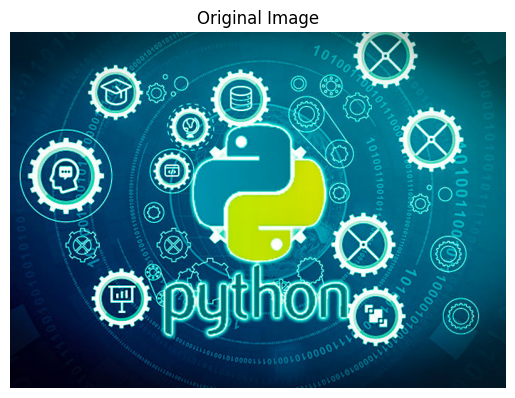

Image Format       : JPEG
Image Mode         : RGB
Image Size (WxH)   : (696, 500)

EXIF Metadata:
  Tag 296: 2
  Tag 34665: 168
  Tag 305: Adobe Photoshop CC 2015 (Windows)
  Tag 274: 1
  Tag 306: 2018:08:28 13:11:13
  Tag 282: 72.0
  Tag 283: 72.0


In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

# Load image using PIL
image_path = 'main_image.jpg'   
image = Image.open(image_path)

# Display using matplotlib
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')
plt.show()

# Print image information
print("Image Format       :", image.format)
print("Image Mode         :", image.mode)
print("Image Size (WxH)   :", image.size)


# Check for EXIF metadata (if available)
try:
    exif_data = image.getexif()
    if exif_data:
        print("\nEXIF Metadata:")
        for tag, value in exif_data.items():
            print(f"  Tag {tag}: {value}")
    else:
        print("\nNo EXIF metadata found.")
except Exception as e:
    print("\nUnable to retrieve EXIF metadata:", e)


### Image as NumPy Array


### Understanding Image Arrays: Height, Width, and Color Channels

When we load an image using PIL and convert it to a NumPy array, we get a **3-dimensional matrix** where:

- **Height**: The number of rows in the image (how tall the image is)
- **Width**: The number of columns (how wide the image is)
- **Channels**: The depth of the array, representing color components (e.g., Red, Green, Blue)

So an image with shape `(300, 400, 3)` means:
- **300 pixels** high (height)
- **400 pixels** wide (width)
- **3 color channels**: RGB (Red, Green, Blue)

Each pixel is represented as a combination of three values between **0 and 255**, corresponding to the intensity of **Red**, **Green**, and **Blue** light.

#### Example:
A single pixel like `[128, 64, 255]` means:
- 128 intensity of red
- 64 intensity of green
- 255 intensity of blue

These values are stored as integers, usually with the `uint8` (unsigned 8-bit integer) data type.

 


In [53]:
image_array = np.array(image)
print("Shape of image array:", image_array.shape)
print("Data type:", image_array.dtype)
image_array[:5, :5]  # Display top-left corner pixels

Shape of image array: (500, 696, 3)
Data type: uint8


array([[[ 2, 26, 38],
        [ 2, 26, 38],
        [ 2, 25, 39],
        [ 2, 25, 39],
        [ 2, 25, 39]],

       [[ 2, 26, 38],
        [ 2, 26, 38],
        [ 2, 25, 39],
        [ 2, 25, 39],
        [ 2, 25, 39]],

       [[ 2, 26, 38],
        [ 2, 26, 38],
        [ 2, 25, 39],
        [ 2, 25, 39],
        [ 2, 25, 39]],

       [[ 2, 26, 38],
        [ 2, 26, 38],
        [ 2, 25, 39],
        [ 2, 25, 39],
        [ 2, 25, 39]],

       [[ 2, 26, 38],
        [ 2, 26, 38],
        [ 2, 25, 39],
        [ 2, 25, 39],
        [ 2, 25, 39]]], dtype=uint8)

## 2. Image Manipulation

### Convert to Grayscale

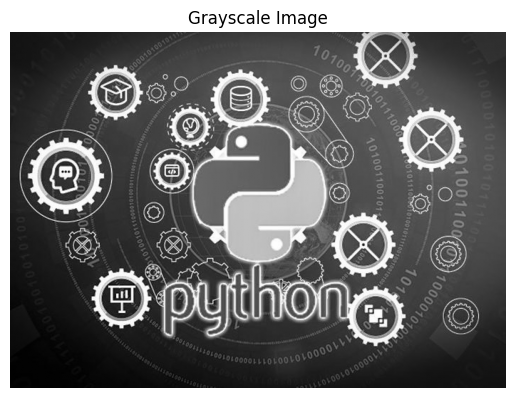

In [54]:
# Convert the original image to grayscale using PIL's 'L' mode.
# 'L' stands for "luminance" and results in a single-channel (black & white) image.
gray_image = image.convert('L')

# Display the grayscale image using matplotlib.
# 'cmap="gray"' ensures that the image is rendered in grayscale color mapping.
plt.imshow(gray_image, cmap='gray')

# Remove axis ticks and labels for a cleaner display.
plt.axis('off')

# Set the title of the plot to indicate it's a grayscale image.
plt.title('Grayscale Image')

# Render and show the image on the screen.
plt.show()


### Crop the Image

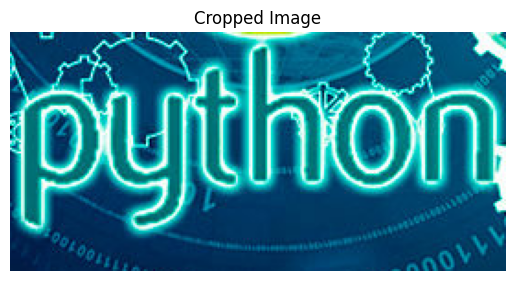

In [55]:
# Crop a rectangular region from the image using PIL's crop() method.
# The argument to crop() is a 4-tuple: (left, upper, right, lower)
# It defines a box with:
# - left = 210 pixels from the left edge,
# - upper = 320 pixels from the top edge,
# - right = 480 pixels from the left edge,
# - lower = 450 pixels from the top edge.

cropped = image.crop((210, 320, 480, 450))

# Display the cropped image using matplotlib.
plt.imshow(cropped)

# Hide axis ticks and labels for a cleaner view.
plt.axis('off')

# Add a title to indicate that this is the cropped portion.
plt.title('Cropped Image')

# Render the cropped image plot.
plt.show()


### Split RGB Channels

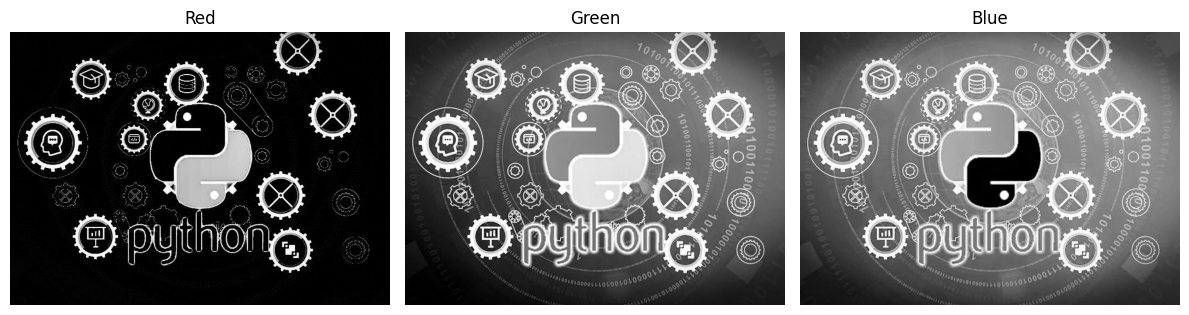

In [57]:
# Split the original RGB image into its Red, Green, and Blue channels.
# Each channel is returned as a grayscale image (i.e., intensity of that color per pixel).
r, g, b = image.split()

# Create a new figure with a specific size (width=12, height=4 inches)
plt.figure(figsize=(12, 4))

# Loop over each channel (r, g, b), and assign an index starting from 1
for idx, channel in enumerate((r, g, b), start=1):
    
    # Create a subplot (1 row, 3 columns, current index)
    plt.subplot(1, 3, idx)
    
    # Display the current channel as a grayscale image
    plt.imshow(channel, cmap='gray')
    
    # Hide axis labels and ticks for a cleaner display
    plt.axis('off')
    
    # Set the title for each subplot: Red, Green, Blue
    plt.title(['Red', 'Green', 'Blue'][idx - 1])

# Adjust layout spacing so the subplots don't overlap
plt.tight_layout()

# Display the figure
plt.show()


## 3. Pixel Intensity Histogram

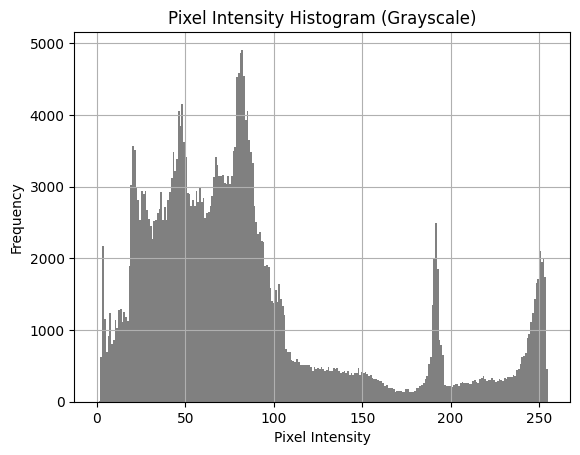

In [59]:
# Convert the grayscale image into a NumPy array and flatten it into a 1D array.
# This gives us a sequence of pixel intensity values (0–255) for histogram plotting.
gray_array = np.array(gray_image).flatten()

# Plot the histogram of pixel intensities.
# - bins=256 ensures each possible intensity value (0–255) gets its own bar.
# - range=(0, 255) defines the intensity scale.
# - color='gray' sets the color of the bars to gray to match the grayscale image.
plt.hist(gray_array, bins=256, range=(0, 255), color='gray')

# Set the title of the plot.
plt.title('Pixel Intensity Histogram (Grayscale)')

# Label the x-axis to indicate pixel intensity values.
plt.xlabel('Pixel Intensity')

# Label the y-axis to show the frequency (number of pixels per intensity level).
plt.ylabel('Frequency')

# Add a grid for easier readability.
plt.grid(True)

# Render the plot to screen.
plt.show()


###  Interpretation of the Grayscale Pixel Intensity Histogram

This histogram represents the distribution of pixel intensities in the **grayscale version** of the image. Here's how to understand it:

---

#### **X-axis: Pixel Intensity (0–255)**
- **0** represents **black** (darkest)
- **255** represents **white** (brightest)
- Intermediate values represent various shades of gray

---

#### **Y-axis: Frequency**
- Shows the **number of pixels** for each intensity level
- **Taller bars** indicate more pixels at that brightness

---

#### **What This Histogram Tells Us**
- **Multiple peaks near the dark end (0–100)**: A lot of dark pixels exist (e.g., shadows, dark objects)
- **Few pixels around mid-tones (100–150)**: Indicates reduced detail in middle brightness
- **Spikes near high values (190 and 250)**: Suggests bright or overexposed regions, such as backgrounds or highlights
- The distribution appears **bimodal or skewed**, indicating the image has strong contrast

---

#### Why This Is Useful
- Histogram analysis helps in:
  - **Enhancing contrast**
  - **Applying thresholding for segmentation**
  - **Deciding on normalization or histogram equalization**

Use this to better understand the brightness composition of the image and guide your preprocessing decisions.


In [60]:
print("Image Shape:", image_array.shape)
print("Mean pixel value (R, G, B):", np.mean(image_array, axis=(0, 1)))
print("Standard deviation (R, G, B):", np.std(image_array, axis=(0, 1)))

Image Shape: (500, 696, 3)
Mean pixel value (R, G, B): [ 29.51862356 106.46202299 121.97860632]
Standard deviation (R, G, B): [70.74417082 69.77855457 58.45068674]


### Taking it to the next level

Most frequent pixel intensity: 82


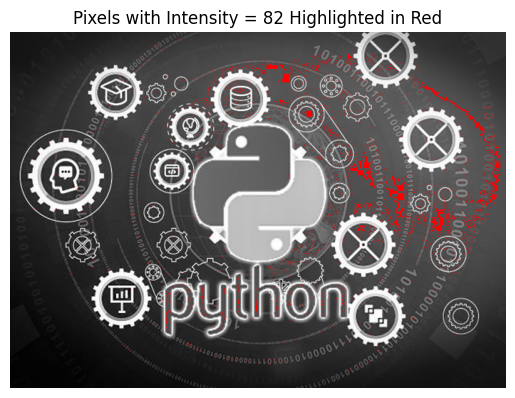

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Step 1: Convert grayscale image to NumPy array
gray_array = np.array(gray_image)

# Step 2: Flatten and find the most frequent pixel intensity
flattened = gray_array.flatten()
counts = np.bincount(flattened)
most_frequent_intensity = np.argmax(counts)
print(f"Most frequent pixel intensity: {most_frequent_intensity}")

# Step 3: Create a mask where pixel intensity matches the most frequent value
mask = gray_array == most_frequent_intensity

# Step 4: Create an RGB image from grayscale to allow color overlay
highlighted = np.stack([gray_array]*3, axis=-1)

# Step 5: Highlight the pixels with the most frequent value in red
# Red = [255, 0, 0]
highlighted[mask] = [255, 0, 0]

# Step 6: Display the image
plt.imshow(highlighted)
plt.title(f"Pixels with Intensity = {most_frequent_intensity} Highlighted in Red")
plt.axis('off')
plt.show()
